In [74]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

(512, 512)


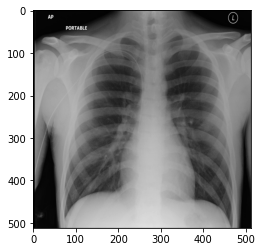

In [75]:
img = cv2.imread("/content/drive/MyDrive/Gaussian/Normal/Normal-3.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

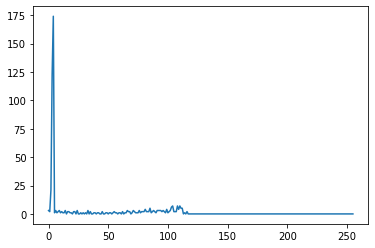

In [76]:
hist=cv2.calcHist(img,[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

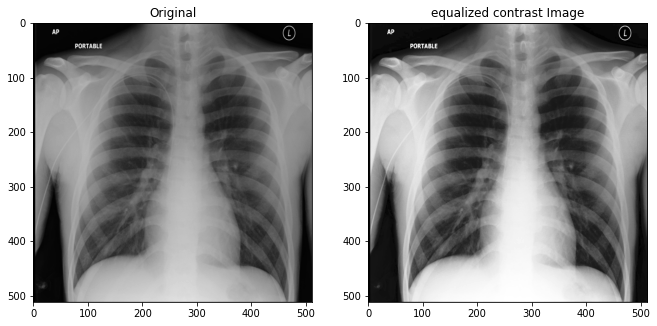

In [77]:
img_equalize = cv2.equalizeHist(img)
plt.figure(figsize=(11,9))
plt.subplot(121), plt.title("Original"), plt.imshow(img,cmap='gray')
plt.subplot(122), plt.title("equalized contrast Image"), plt.imshow(img_equalize,cmap='gray')
plt.show()

# Contrast Limited Adaptive Histogram Equalization

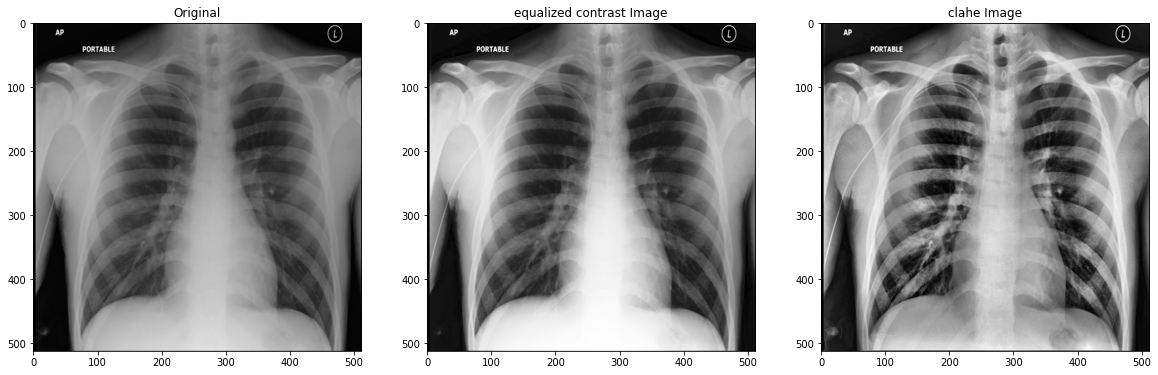

In [81]:
clahe = cv2.createCLAHE(clipLimit=3.8)
clahe_img = clahe.apply(img)

plt.figure(figsize=(20,13))
plt.subplot(131), plt.title("Original"), plt.imshow(img,cmap='gray')
plt.subplot(132), plt.title("equalized contrast Image"), plt.imshow(img_equalize,cmap='gray')
plt.subplot(133), plt.title("clahe Image"), plt.imshow(clahe_img,cmap='gray')
plt.show()

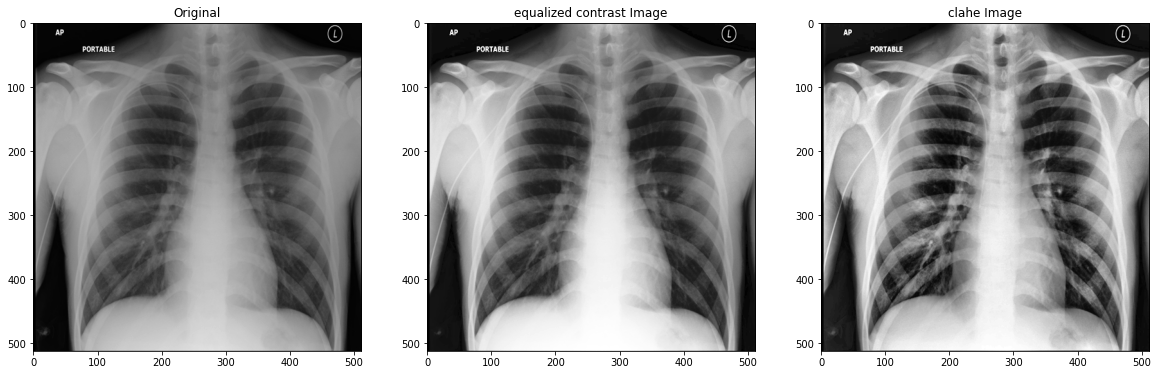

In [ ]:
clahe = cv2.createCLAHE(clipLimit=3)
clahe_img = clahe.apply(img_equalize)

plt.figure(figsize=(20,13))
plt.subplot(131), plt.title("Original"), plt.imshow(img,cmap='gray')
plt.subplot(132), plt.title("equalized contrast Image"), plt.imshow(img_equalize,cmap='gray')
plt.subplot(133), plt.title("clahe Image"), plt.imshow(clahe_img,cmap='gray')
plt.show()

# adaptive gamma correction

In [ ]:
gamma_value  = 1.0 / 0.6

img_array = []
for i in np.arange(0,256):
    a = ((i/255)**invGamma2)*255
    img_array.append(a)
img_array = np.array(img_array).astype("uint8")

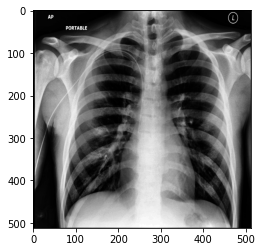

In [ ]:
final_gamma_img = cv2.LUT(clahe_img,img_array)
plt.imshow(final_gamma_img,cmap="gray")
plt.show()

# Min-Max Constrast Stretching

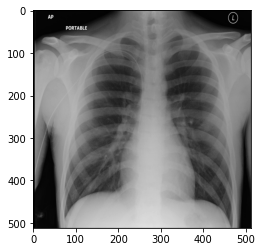

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/Gaussian/Normal/Normal-3.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
min = np.min(img2)
max = np.max(img2)

for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        img2[i,j] = 255*(img2[i,j]-min)/(max-min)
plt.imshow(img2,cmap='gray')

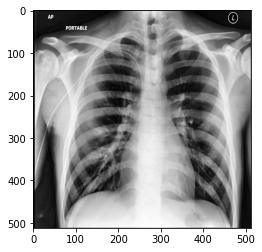

In [ ]:
min2 = np.min(clahe_img)
max2 = np.max(clahe_img)

for i in range(clahe_img.shape[0]):
    for j in range(clahe_img.shape[1]):
        clahe_img[i,j] = 255*(clahe_img[i,j]-min2)/(max2-min2)
        new_img = clahe_img
plt.imshow(new_img,cmap='gray')

# Using PIL library

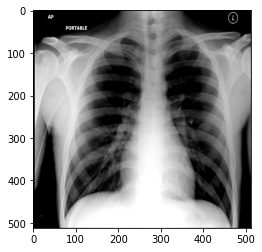

In [ ]:
from PIL import Image
from PIL import ImageEnhance
img = Image.open('/content/drive/MyDrive/Gaussian/Normal/Normal-3.png')
enh_con = ImageEnhance.Contrast(img)
contrast = 1.8
img_contrasted = enh_con.enhance(contrast)
plt.imshow(img_contrasted)

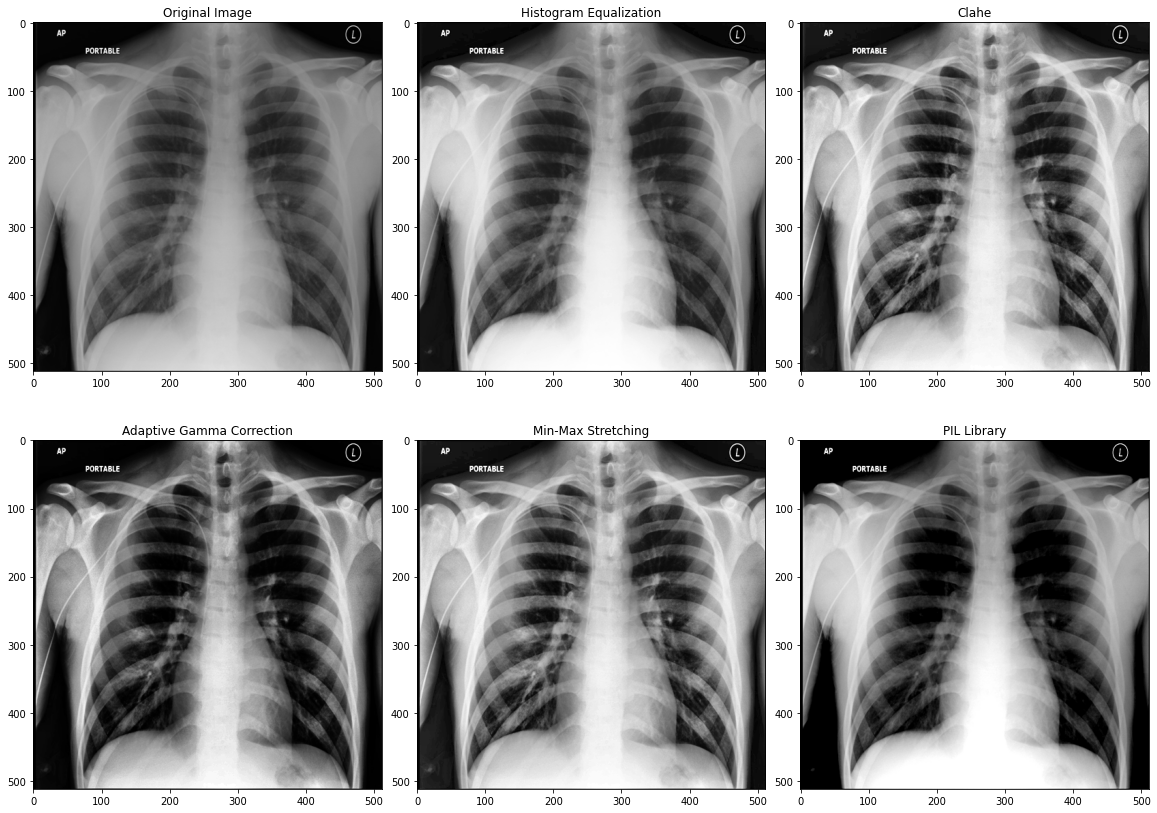

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(231), plt.imshow(img,cmap="gray"), plt.title("Original Image")
plt.subplot(232), plt.imshow(img_equalize,cmap="gray"), plt.title("Histogram Equalization")
plt.subplot(233), plt.imshow(clahe_img,cmap="gray"), plt.title("Clahe")
plt.subplot(234), plt.imshow(final_gamma_img,cmap="gray"), plt.title("Adaptive Gamma Correction")
plt.subplot(235), plt.imshow(new_img,cmap="gray"), plt.title("Min-Max Stretching")
plt.subplot(236), plt.imshow(img_contrasted,cmap="gray"), plt.title("PIL Library")
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.show()

# Adaptive Thresholding

In [ ]:
image1 = cv2.imread("/content/drive/MyDrive/Gaussian/Normal/Normal-3.png",0)

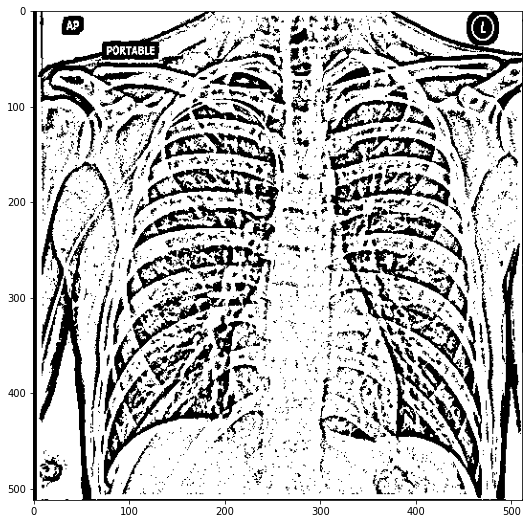

In [ ]:
thresh1 = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(11,9))
plt.imshow(thresh1,cmap='gray')

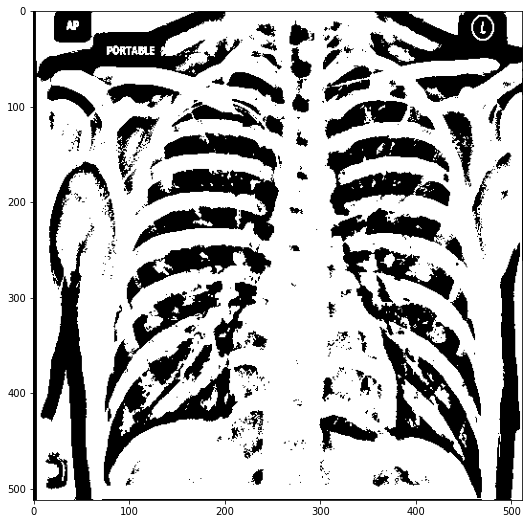

In [ ]:
thresh2 = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                cv2.THRESH_BINARY, 31, 3)
plt.figure(figsize=(11,9))
plt.imshow(thresh2,cmap='gray')